In [23]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
links = pd.read_csv('links.csv')
tags = pd.read_csv('tags.csv')

tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


<Figure size 360x360 with 0 Axes>

<AxesSubplot:ylabel='rating'>

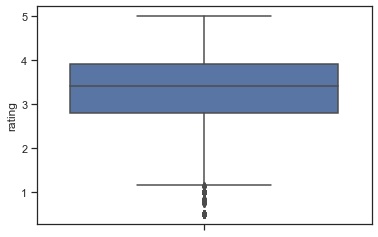

In [24]:

# mean of movie id = 1 ratings
ratings.query('movieId==1').rating.mean()

# mean of all ratings via groupby
mean_per_movie = ratings.groupby('movieId').mean()['rating']

#mean_per_movie.plot(kind='hist')
sb.boxplot(y=mean_per_movie)
#sb.distplot(mean_per_movie)

Text(0.5, 1.0, 'Histogram of mean ratings')

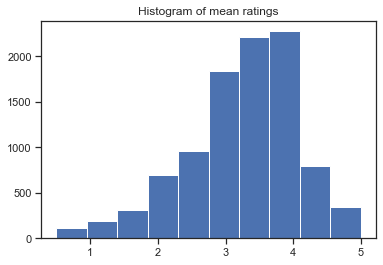

In [25]:
plt.hist(mean_per_movie)
plt.title("Histogram of mean ratings")

<AxesSubplot:xlabel='original_language', ylabel='total'>

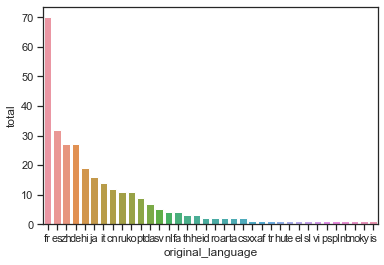

In [26]:


tmdb.original_language.unique()

tmdb['original_language'].value_counts()

# transform series to data frame
language_count = tmdb['original_language'].value_counts().to_frame().reset_index()
language_count.columns = ['original_language', 'total']

# plotting results without the 'en' values
sb.barplot(x = 'original_language', y = 'total', 
           data = language_count[(language_count['original_language']!='en')])


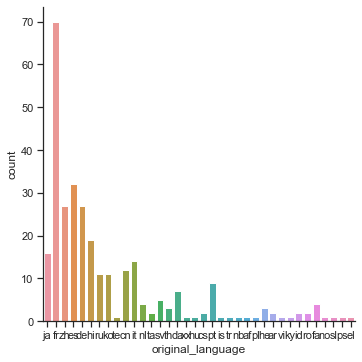

In [27]:
# Alternative plot and easy way

sb.catplot(x = 'original_language', kind = 'count', data = tmdb[(tmdb['original_language']!='en')])


<AxesSubplot:>

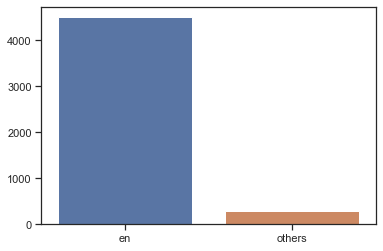

In [28]:
# all languages count except 'en'
others = tmdb[(tmdb['original_language']!='en')]['original_language'].value_counts().sum()
en = tmdb[(tmdb['original_language']=='en')]['original_language'].value_counts().sum()
df = {
    'original_language' : ['en', 'others'],
    'total' : [en, others]
}

sb.barplot(x = 'original_language', y = 'total', data = df)

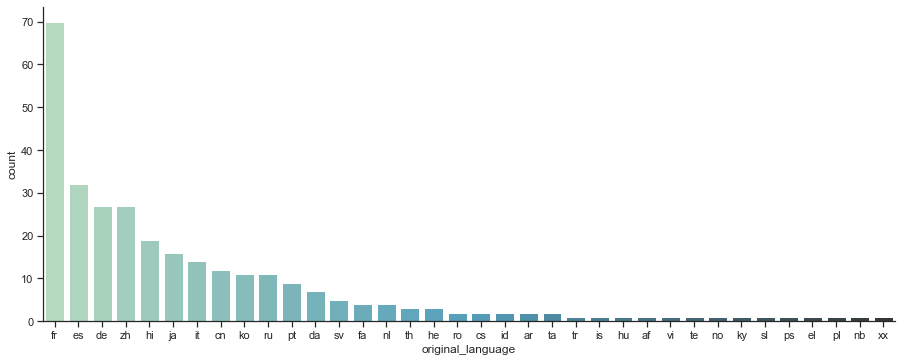

In [29]:
# all languages count except 'en' (alternate method using query)
others2 = tmdb.query("original_language != 'en'")['original_language'].value_counts().sum()
en2 = tmdb.query("original_language == 'en'")['original_language'].value_counts().sum()
df2 = {
    'original_language' : ['en', 'others'],
    'total' : [en, others]
}

#sb.barplot(x = 'original_language', y = 'total', data = df)
other_languages = tmdb.query("original_language != 'en'")
sb.catplot(x='original_language', kind='count', data=other_languages, aspect=2.5,
           palette='GnBu_d',
           order=other_languages['original_language'].value_counts().index,
          )

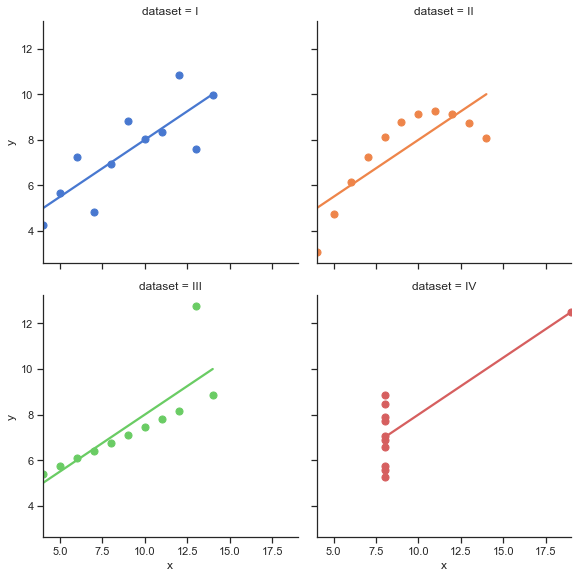

In [30]:
sb.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sb.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sb.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

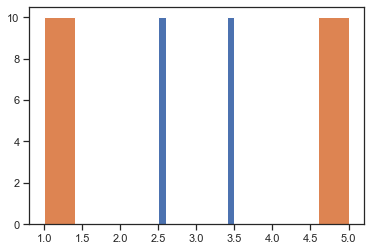

In [31]:
# extract info from Toy Story and Jumanji
toy_story = ratings.query('movieId==1')
jumanji = ratings.query('movieId==2')
#print(len(toy_story), len(jumanji))
#sb.histplot(toy_story['rating'])

movie1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
movie2 = np.append(np.array([1] * 10), np.array([5] * 10))

movie1.mean() == movie2.mean()
np.median(movie1) == np.median(movie2)

plt.hist(movie1)
plt.hist(movie2)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b401f60310>,
 'caps': [<matplotlib.lines.Line2D at 0x1b401f609d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b401f53f70>,
 'medians': [<matplotlib.lines.Line2D at 0x1b401f6d0d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b401f6d430>,
 'means': []}

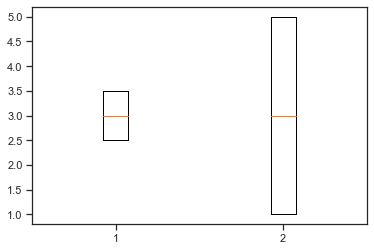

In [33]:
plt.boxplot([movie1,movie2])

<AxesSubplot:xlabel='movieId', ylabel='rating'>

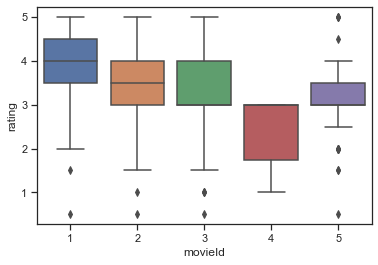

In [60]:
# Multiple boxplots
sb.boxplot(x="movieId", y='rating', data=ratings.query('movieId in [1,2,3,4,5]'))

In [67]:
# Standart Deviation
jumanji.rating.std()

np.std(jumanji.rating), np.std(toy_story.rating)

(0.8776965532969931, 0.8329153449641146)